## Library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import time
import seaborn as sns
import numpy as np 

In [2]:
# Reset the color palette to default
sns.set_palette(None)
sns.set_style("ticks")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# define the default font size
plt.rcParams.update({'font.size': 14})

## Read data

In [5]:
# read in the data
df = pd.read_excel("Dividend_payout_data_new.xlsx")
df.head()

,Symbol,Year,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type
0,CHP.HM,2014,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities
1,POM.HM,2014,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material
2,V21.HN,2014,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
3,LIG.HN,2014,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
4,MCC.HN,2014,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material


In [6]:
df['Type'].unique()

array(['Utilities', 'Material', 'Industrials', 'Consumer_discretionary',
       'Real_estate', 'Financials', 'Energy', 'Health_care',
       'Information_technology', 'Consumer_staples',
       'Communication_services'], dtype=object)

## Missing values

In [7]:
# read in the data
df = pd.read_excel("Dividend_payout_data_new.xlsx")

# compute the percentage of missing values in each row
percent_missing = df.isna().sum(axis=1) / len(df.columns)

# compute the average percentage of missing values across all rows
avg_percent_missing = percent_missing.mean()

# print the results
print(f"Percentage of rows with missing values: {avg_percent_missing:.2%}")

Percentage of rows with missing values: 4.43%


<AxesSubplot:>

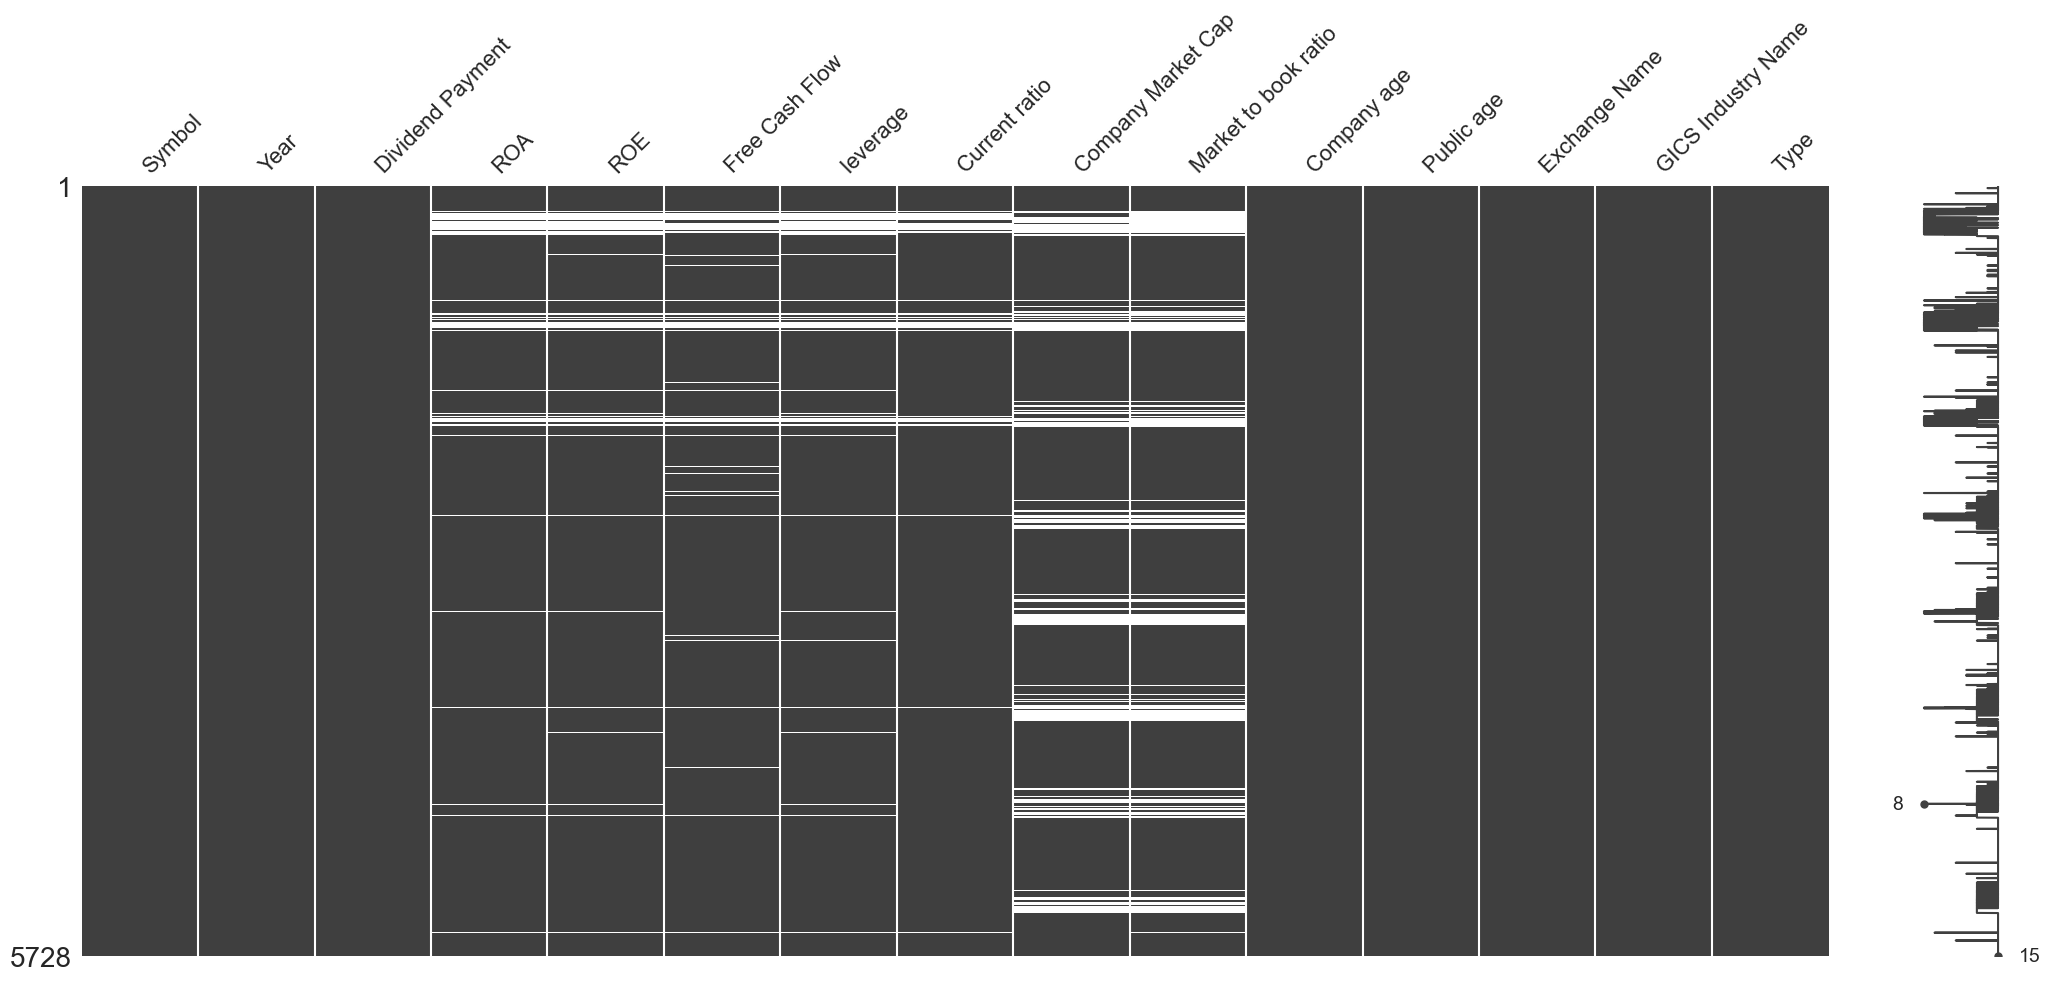

In [8]:
import pandas as pd
import missingno as msno

# create a matrix plot of missing values
msno.matrix(df)

,Total,Percent
Market to book ratio,1023,0.178596
Company Market Cap,955,0.166725
Free Cash Flow,386,0.067388
leverage,382,0.066690
ROE,381,0.066515
ROA,376,0.065642
Current ratio,301,0.052549
Symbol,0,0.000000
Year,0,0.000000
Dividend Payment,0,0.000000


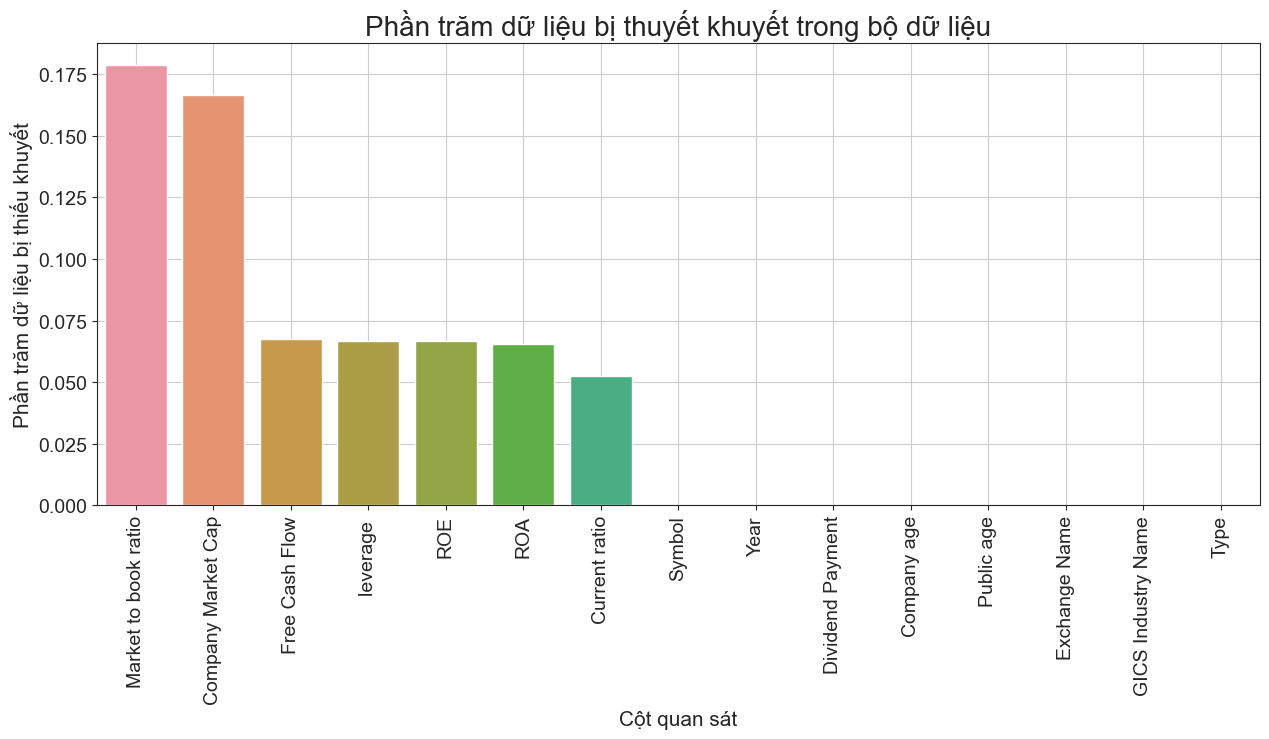

In [9]:
# Phần trăm bị thiếu khuyết
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Visualization missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Cột quan sát', fontsize=15)
plt.ylabel('Phần trăm dữ liệu bị thiếu khuyết', fontsize=15)
plt.title('Phần trăm dữ liệu bị thuyết khuyết trong bộ dữ liệu', fontsize=20)
plt.grid()
missing_data

In [10]:
# remove N/A
df = df.dropna()
df.head()

,Symbol,Year,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type
0,CHP.HM,2014,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities
1,POM.HM,2014,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material
2,V21.HN,2014,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
3,LIG.HN,2014,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
4,MCC.HN,2014,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material


## Outlier

In [11]:
# Tìm các biến trực quan
df_corr =  pd.DataFrame(df.corr().iloc[:,1])
print('2 biến trực quan nhất với biến mục tiêu là ROA, ROE')
df_corr.drop(index=['Dividend Payment','Year'], inplace=True)
df_corr 

2 biến trực quan nhất với biến mục tiêu là ROA, ROE


,Dividend Payment
ROA,0.145523
ROE,0.130630
Free Cash Flow,-0.022615
leverage,-0.017716
Current ratio,-0.079934
Company Market Cap,0.033366
Market to book ratio,0.032641
Company age,0.086315
Public age,0.088126


In [12]:

# Tạo một list chứa tên các cột
columns = ['ROA', 'ROE', 'Free Cash Flow', 'Leverage', 'Current Ratio', 
           'Company Market Cap', 'Market to Book Ratio', 'Company Age', 'Public Age']

# Tạo một list chứa các giá trị của các cột thứ 2
Correlation = [0.145523, 0.130630, 0.022615, -0.017716, -0.079934, 0.033366, 0.032641, 0.086315, 0.088126]

# Tạo data frame từ các list đã có
df_corr = pd.DataFrame({'Variables': columns, 'Dividend Payment': Correlation})
df_corr.set_index('Variables', inplace=True)
df_corr


,Dividend Payment
Variables,
ROA,0.145523
ROE,0.130630
Free Cash Flow,0.022615
Leverage,-0.017716
Current Ratio,-0.079934
Company Market Cap,0.033366
Market to Book Ratio,0.032641
Company Age,0.086315
Public Age,0.088126


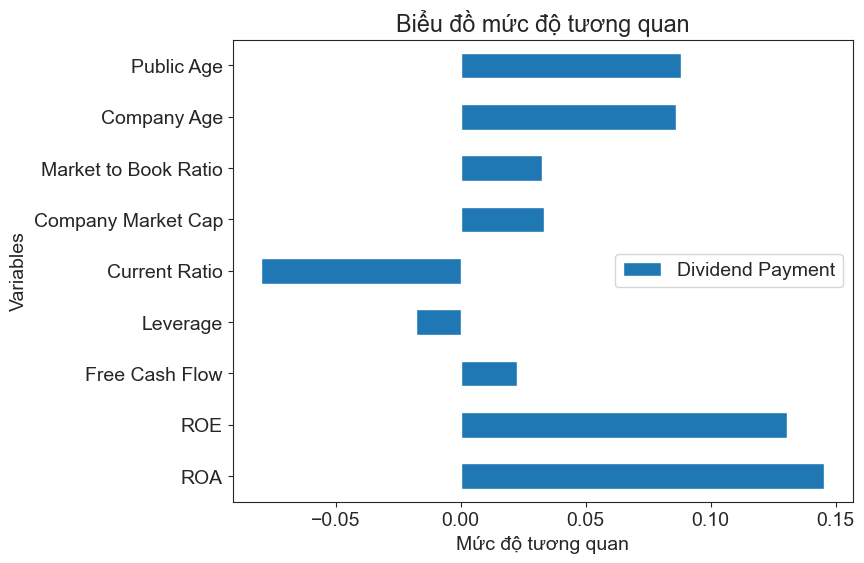

In [13]:
ax = df_corr.plot.barh(figsize=(8, 6))
ax.set_xlabel('Mức độ tương quan')
ax.set_title('Biểu đồ mức độ tương quan')

plt.show()

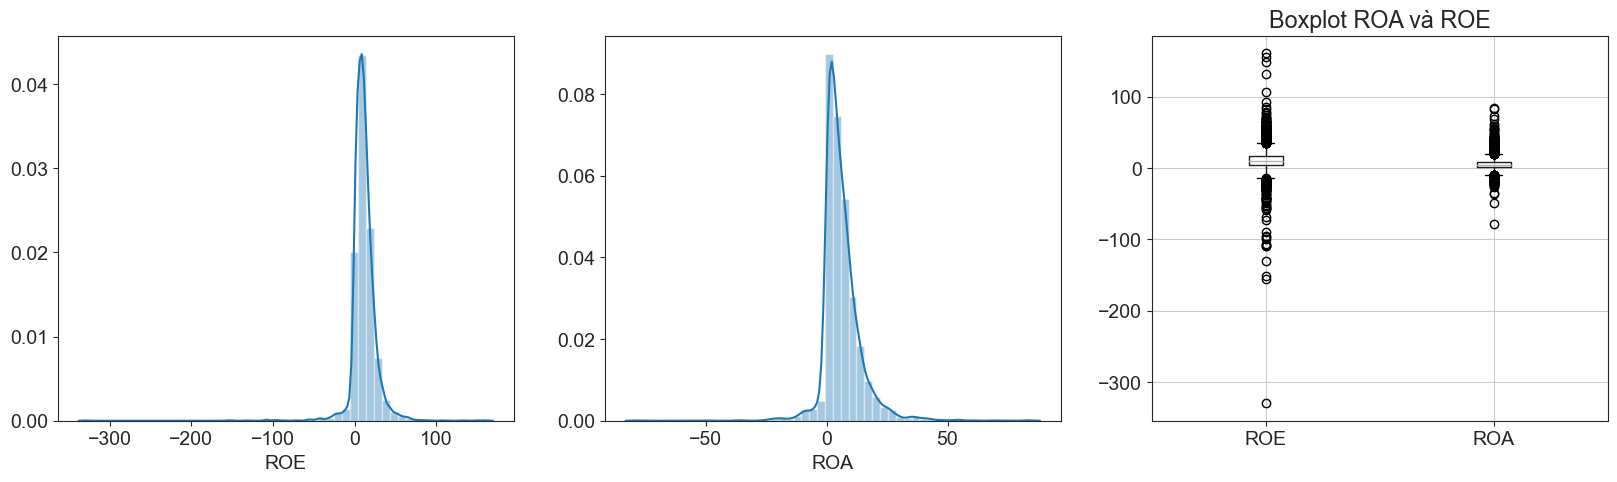

In [14]:
# Tạo figure và axes
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Vẽ biểu đồ ROE trên axes[0]
sns.distplot(df['ROE'], ax=axes[0])
axes[0].set_ylabel('')

# Vẽ biểu đồ ROA trên axes[1]
sns.distplot(df['ROA'], ax=axes[1])
axes[1].set_ylabel('')

# Sử dụng boxplot để phát hiện outlier của ROE và ROA trên axes[2]
df.boxplot(column=['ROE', 'ROA'], ax=axes[2])

# Thêm tiêu đề cho biểu đồ boxplot
axes[2].set_title('Boxplot ROA và ROE')

# Thêm tiêu đề cho trục y của các biểu đồ
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Hiển thị hình ảnh
plt.show()

In [15]:
df_test = df

In [16]:
# IQR ROA
Q1 = df['ROA'].quantile(0.25)
Q3 = df['ROA'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR

df = df[(df['ROA'] > (Q1 - threshold)) & (df['ROA'] < (Q3 + threshold))]

# IQR ROE
Q1 = df['ROE'].quantile(0.25)
Q3 = df['ROE'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR

df = df[(df['ROE'] > (Q1 - threshold)) & (df['ROE'] < (Q3 + threshold))]

print(f'Dữ liệu còn lại sau khi lấy outlier ROA và ROE là {(df.shape[0] / df_test.shape[0]) * 100} %')
print(df.shape)
df.head()

Dữ liệu còn lại sau khi lấy outlier ROA và ROE là 91.09514478554321 %
(4184, 15)


,Symbol,Year,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type
0,CHP.HM,2014,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities
1,POM.HM,2014,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material
2,V21.HN,2014,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
3,LIG.HN,2014,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
4,MCC.HN,2014,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material


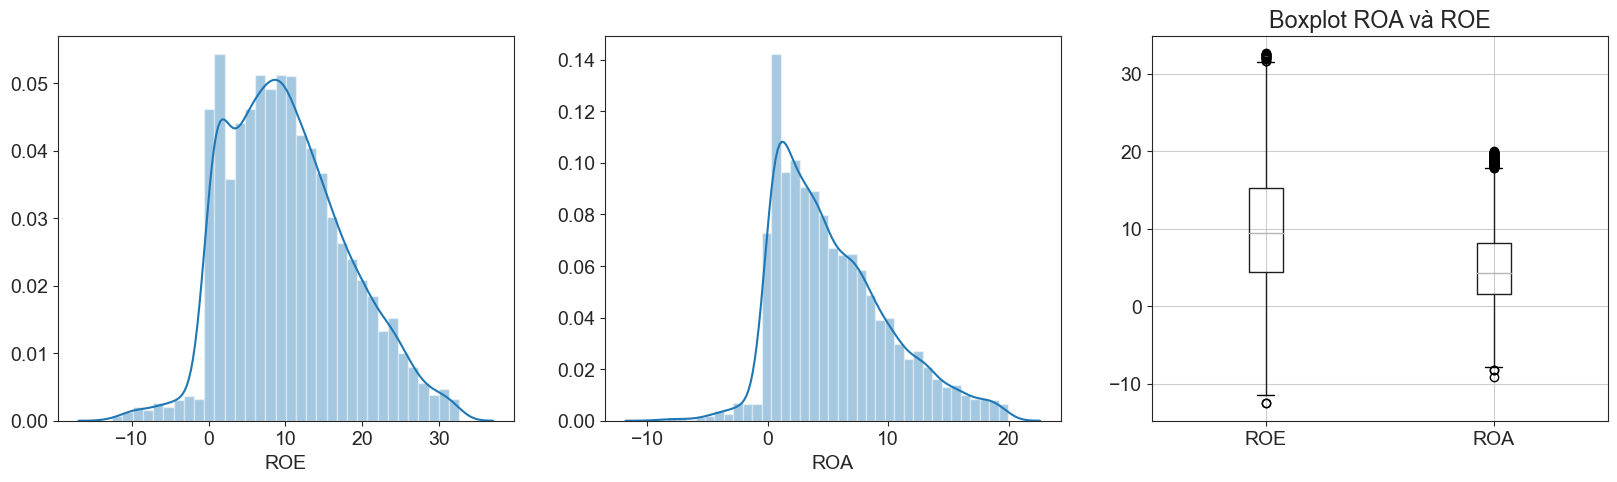

In [17]:
# Tạo figure và axes
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Vẽ biểu đồ ROE trên axes[0]
sns.distplot(df['ROE'], ax=axes[0])
axes[0].set_ylabel('')

# Vẽ biểu đồ ROA trên axes[1]
sns.distplot(df['ROA'], ax=axes[1])
axes[1].set_ylabel('')

# Sử dụng boxplot để phát hiện outlier của ROE và ROA trên axes[2]
df.boxplot(column=['ROE', 'ROA'], ax=axes[2])

# Thêm tiêu đề cho biểu đồ boxplot
axes[2].set_title('Boxplot ROA và ROE')

# Thêm tiêu đề cho trục y của các biểu đồ
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Hiển thị hình ảnh
plt.show()

In [18]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4184 entries, 0 to 5727
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                4184 non-null   object 
 1   Year                  4184 non-null   int64  
 2   Dividend Payment      4184 non-null   int64  
 3   ROA                   4184 non-null   float64
 4   ROE                   4184 non-null   float64
 5   Free Cash Flow        4184 non-null   float64
 6   leverage              4184 non-null   float64
 7   Current ratio         4184 non-null   float64
 8   Company Market Cap    4184 non-null   float64
 9   Market to book ratio  4184 non-null   float64
 10  Company age           4184 non-null   int64  
 11  Public age            4184 non-null   int64  
 12  Exchange Name         4184 non-null   object 
 13  GICS Industry Name    4184 non-null   object 
 14  Type                  4184 non-null   object 
dtypes: float64(7), int64(

## Trực quan hóa dữ liệu

##### Categorical data

In [19]:
# Energy = gr_1[gr_1['Type'] == 'Energy'] 
# Material = gr_1[gr_1['Type'] == 'Material'] 
# Industrials = gr_1[gr_1['Type'] == 'Industrials'] 
# Consumer_discretionary = gr_1[gr_1['Type'] == 'Consumer_discretionary'] 
# Consumer_staples = gr_1[gr_1['Type'] == 'Consumer_staples'] 
# Health_care = gr_1[gr_1['Type'] == 'Health_care'] 
# EnergFinancialsy = gr_1[gr_1['Type'] == 'Financials'] 
# Information_technology = gr_1[gr_1['Type'] == 'Information_technology'] 
# Communication_services = gr_1[gr_1['Type'] == 'Communication_services'] 
# Utilities = gr_1[gr_1['Type'] == 'Utilities'] 
# Real_estate = gr_1[gr_1['Type'] == 'Real_estate'] 

# ax = Energy.plot.bar(x='GICS Industry Name', y='Count', rot=0)
# # Thiết lập tiêu đề và tên trục
# ax.set_title('Energy')
# ax.set_ylabel('Số lượng')
# ax.grid()
# # Hiển thị biểu đồ
# plt.show()

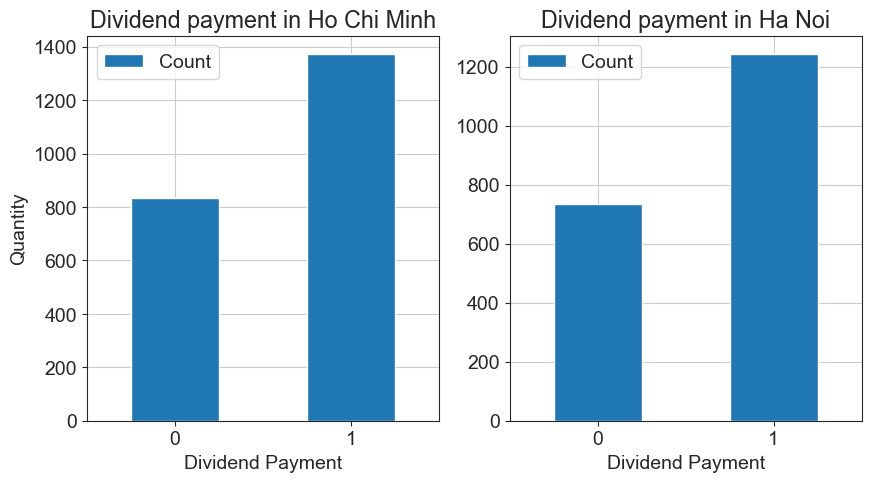

In [20]:
# Gộp các nhóm
gr_1 = df.groupby(['Exchange Name','Dividend Payment']).agg( Count = ( 'Dividend Payment','count' )).reset_index()

# Fill 2 sàn
Dividend_HN = gr_1[gr_1['Exchange Name'] == 'HANOI STOCK EXCHANGE'] 
Dividend_HCM = gr_1[gr_1['Exchange Name'] == 'HOCHIMINH STOCK EXCHANGE'] 

# Biểu đồ 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

Dividend_HCM.plot.bar(x='Dividend Payment', y='Count', rot=0, ax=ax1)
ax1.set_title('Dividend payment in Ho Chi Minh')
ax1.set_ylabel('Quantity')
ax1.grid()

Dividend_HN.plot.bar(x='Dividend Payment', y='Count', rot=0, ax=ax2)
ax2.set_title('Dividend payment in Ha Noi')
ax2.grid()

plt.show()

In [21]:
HN = df[df['Exchange Name'] == 'HANOI STOCK EXCHANGE']
HCM = df[df['Exchange Name'] == 'HOCHIMINH STOCK EXCHANGE'] 

In [22]:
gr_2 = HN.groupby(['Exchange Name','Dividend Payment','Type']).agg( Count = ( 'Type','count' )).reset_index()
gr_2

,Exchange Name,Dividend Payment,Type,Count
0,HANOI STOCK EXCHANGE,0,Communication_services,25
1,HANOI STOCK EXCHANGE,0,Consumer_discretionary,32
2,HANOI STOCK EXCHANGE,0,Consumer_staples,49
3,HANOI STOCK EXCHANGE,0,Energy,46
4,HANOI STOCK EXCHANGE,0,Financials,59
5,HANOI STOCK EXCHANGE,0,Health_care,21
6,HANOI STOCK EXCHANGE,0,Industrials,302
7,HANOI STOCK EXCHANGE,0,Information_technology,17
8,HANOI STOCK EXCHANGE,0,Material,120
9,HANOI STOCK EXCHANGE,0,Real_estate,48


In [23]:
gr_3 = HCM.groupby(['Exchange Name','Dividend Payment','Type']).agg( Count = ( 'Type','count' )).reset_index()
gr_3

,Exchange Name,Dividend Payment,Type,Count
0,HOCHIMINH STOCK EXCHANGE,0,Communication_services,4
1,HOCHIMINH STOCK EXCHANGE,0,Consumer_discretionary,60
2,HOCHIMINH STOCK EXCHANGE,0,Consumer_staples,75
3,HOCHIMINH STOCK EXCHANGE,0,Energy,3
4,HOCHIMINH STOCK EXCHANGE,0,Financials,85
5,HOCHIMINH STOCK EXCHANGE,0,Health_care,39
6,HOCHIMINH STOCK EXCHANGE,0,Industrials,242
7,HOCHIMINH STOCK EXCHANGE,0,Information_technology,8
8,HOCHIMINH STOCK EXCHANGE,0,Material,134
9,HOCHIMINH STOCK EXCHANGE,0,Real_estate,132


##### Numerical data

In [24]:
numerical = df[['ROA', 'ROE', 'Free Cash Flow',
       'leverage ', 'Current ratio', 'Company Market Cap',
       'Market to book ratio', 'Company age', 'Public age']]

In [25]:
numerical.describe()

,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age
count,4184.000000,4184.000000,4.184000e+03,4184.000000,4184.000000,4.184000e+03,4184.000000,4184.000000,4184.000000
mean,5.350623,10.255416,7.864275e+10,1.824935,4.114396,4.781963e+12,33.197135,19.703872,10.408222
std,4.700751,7.752884,1.465300e+12,4.401780,13.871951,2.416207e+13,366.557822,7.136256,4.223121
min,-9.154982,-12.532952,-4.252831e+13,-8.350709,1.008119,3.300000e+09,0.000424,4.000000,-1.000000
25%,1.620034,4.369566,-3.128044e+09,0.462478,1.457958,1.110746e+11,0.279039,14.000000,9.000000
50%,4.295387,9.451134,8.376969e+09,0.976411,1.906695,3.252696e+11,0.823634,18.000000,11.000000
75%,8.096281,15.232936,4.929516e+10,1.972126,2.970493,1.238543e+12,2.744433,23.000000,13.000000
max,19.956404,32.632826,1.984242e+13,176.233004,374.037531,3.873862e+14,15537.193318,61.000000,21.000000


## Data processing for model

In [26]:
# remove the first 2 columns
df = df.drop(columns=['Symbol','Year'])
df 

,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type
0,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities
1,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material
2,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
3,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
4,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,1,0.314662,0.874079,4.491459e+10,1.847085,1.503903,5.972591e+11,0.878609,20,11,HOCHIMINH STOCK EXCHANGE,Building Products,Industrials
5724,0,4.237970,7.027156,1.674845e+10,0.635544,2.609014,2.665900e+11,1.055870,14,11,HANOI STOCK EXCHANGE,Real Estate Management & Development,Real_estate
5725,1,4.712435,9.737101,9.173168e+09,1.226485,1.684698,1.049188e+12,3.745885,29,11,HOCHIMINH STOCK EXCHANGE,Trading Companies & Distributors,Industrials
5726,0,11.209427,13.513555,1.591114e+10,0.304782,3.955457,5.729917e+10,0.491487,21,10,HANOI STOCK EXCHANGE,Pharmaceuticals,Health_care


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# transform the categorical values to numerical format
encoder = LabelEncoder()
df.iloc[:, -2:] = df.iloc[:, -2:].apply(encoder.fit_transform)

# apply reference encoding to the last two columns
df = pd.get_dummies(df, columns=['Exchange Name', 'Type'], drop_first=True)

# print the transformed data
df.head()

,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,...,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7,Type_8,Type_9,Type_10
0,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,...,0,0,0,0,0,0,0,0,0,1
1,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,...,0,0,0,0,0,0,0,1,0,0
2,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,...,0,0,0,0,0,1,0,0,0,0
3,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,...,0,0,0,0,0,1,0,0,0,0
4,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# separate the target variable (y) and the features (X)
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [29]:
# normalize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
# define the classification algorithms
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('ANN', MLPClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()) 
]

## Machine learning
## Warning: This block take almost 5 mins to run

In [31]:
# evaluate each algorithm using 10-fold cross-validation and compute classification report
results = []
names = []
reports = []
times = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    end_time = time.time()
    
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    report = classification_report(y, y_pred, output_dict=True)
    reports.append(report)
    
    results.append(cv_results)
    names.append(name)
    times.append(end_time - start_time)

    print(f"{name} - Mean Accuracy: {cv_results.mean():.3f}, Std Dev: {cv_results.std():.3f}")
    print(f"{name} - Mean Time: {times[-1]:.3f} seconds")

Logistic Regression - Mean Accuracy: 0.659, Std Dev: 0.014
Logistic Regression - Mean Time: 0.080 seconds
KNN - Mean Accuracy: 0.725, Std Dev: 0.015
KNN - Mean Time: 0.513 seconds
Naive Bayes - Mean Accuracy: 0.528, Std Dev: 0.037
Naive Bayes - Mean Time: 0.030 seconds
SVM - Mean Accuracy: 0.683, Std Dev: 0.021
SVM - Mean Time: 4.988 seconds
Decision Tree - Mean Accuracy: 0.655, Std Dev: 0.023
Decision Tree - Mean Time: 0.387 seconds
Random Forest - Mean Accuracy: 0.738, Std Dev: 0.013
Random Forest - Mean Time: 8.488 seconds
Gradient Boosting - Mean Accuracy: 0.701, Std Dev: 0.017
Gradient Boosting - Mean Time: 12.632 seconds
XGBoost - Mean Accuracy: 0.723, Std Dev: 0.013
XGBoost - Mean Time: 1.520 seconds
LightGBM - Mean Accuracy: 0.731, Std Dev: 0.023
LightGBM - Mean Time: 0.776 seconds
CatBoost - Mean Accuracy: 0.739, Std Dev: 0.016
CatBoost - Mean Time: 21.421 seconds
ANN - Mean Accuracy: 0.711, Std Dev: 0.016
ANN - Mean Time: 22.942 seconds
AdaBoost - Mean Accuracy: 0.678, Std De

### Compare accuracy

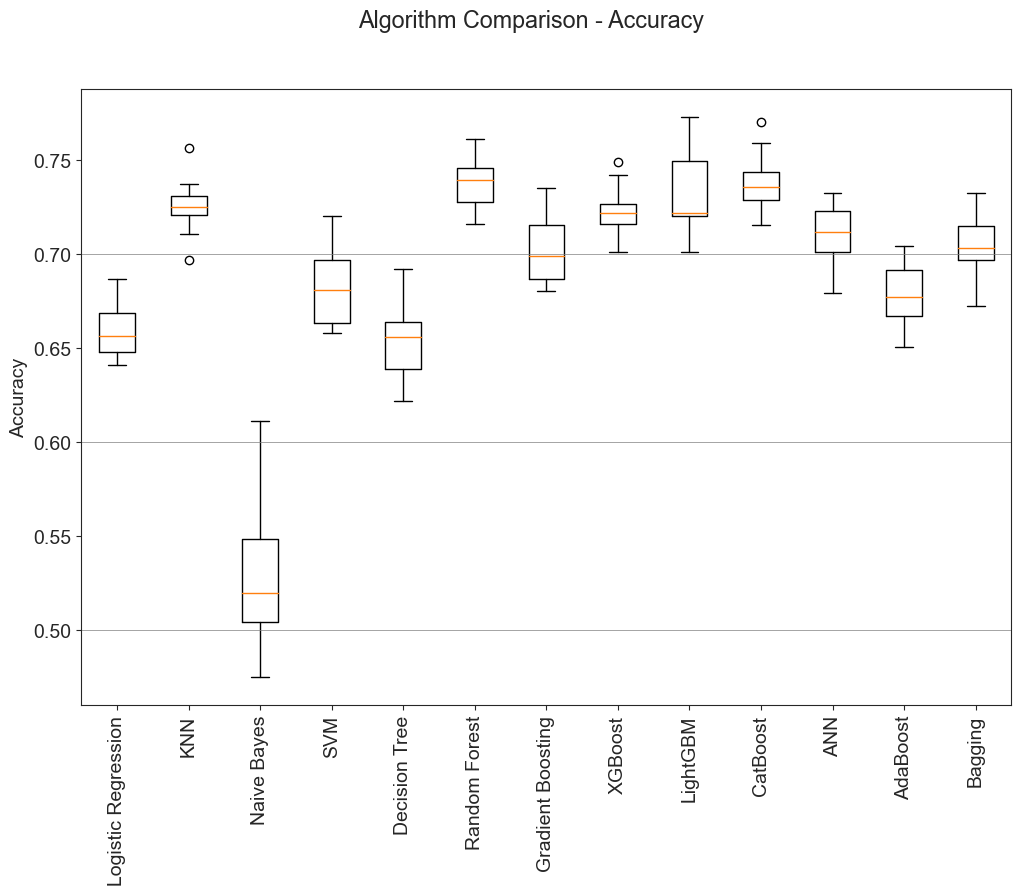

In [32]:
# plot the performance of each algorithm using a box plot
fig1 = plt.figure(figsize=(12, 8))
fig1.suptitle('Algorithm Comparison - Accuracy')
ax1 = fig1.add_subplot(111)
plt.boxplot(results)
ax1.set_xticklabels(names, rotation=90)
ax1.set_ylabel('Accuracy')

# Add horizontal lines at y-ticks
y_ticks = [0.5, 0.6, 0.7]
for y_tick in y_ticks:
    ax1.axhline(y=y_tick, color='grey', linewidth=0.5)
    
plt.show()

## Compare time consumption

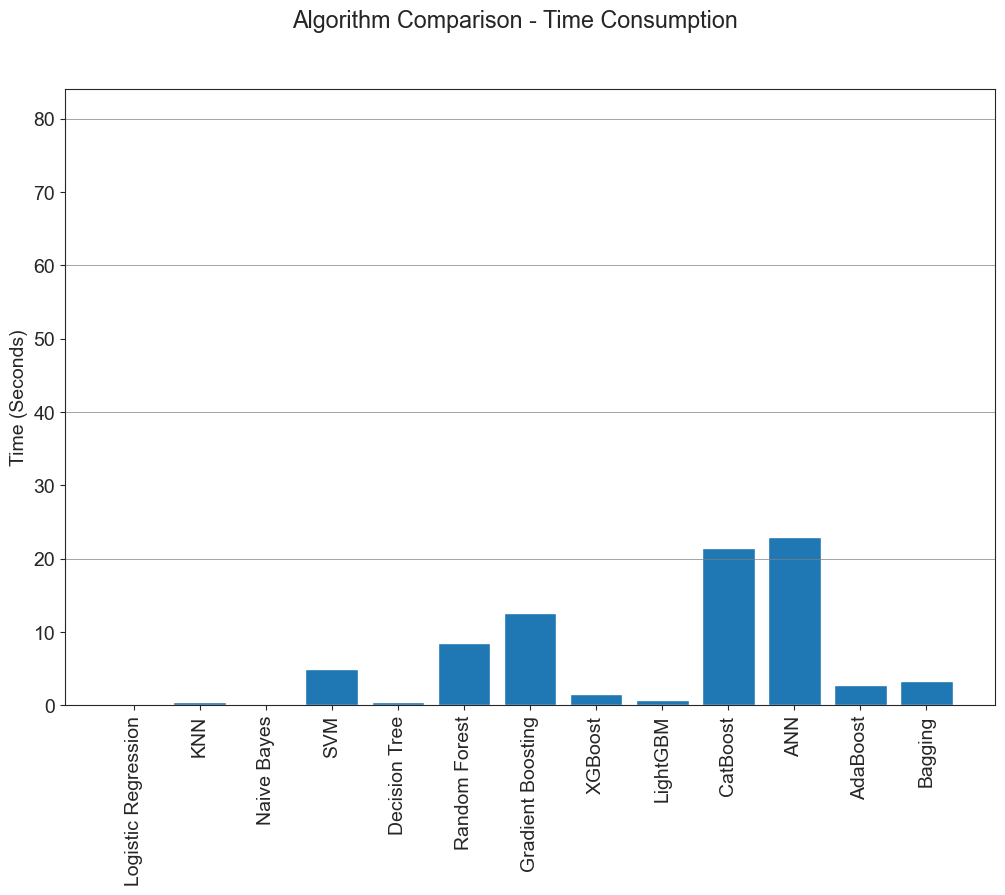

In [33]:
# plot the time consumption of each algorithm using a bar chart
fig2 = plt.figure(figsize=(12, 8))
fig2.suptitle('Algorithm Comparison - Time Consumption')
ax2 = fig2.add_subplot(111)
ax2.bar(names, times)
ax2.set_xticklabels(names, rotation=90)
ax2.set_ylabel('Time (Seconds)')

# Add horizontal lines at y-ticks
y_ticks = [20, 40, 60, 80]
for y_tick in y_ticks:
    ax2.axhline(y=y_tick, color='grey', linewidth=0.5)

plt.show()

### Compare F_1 score

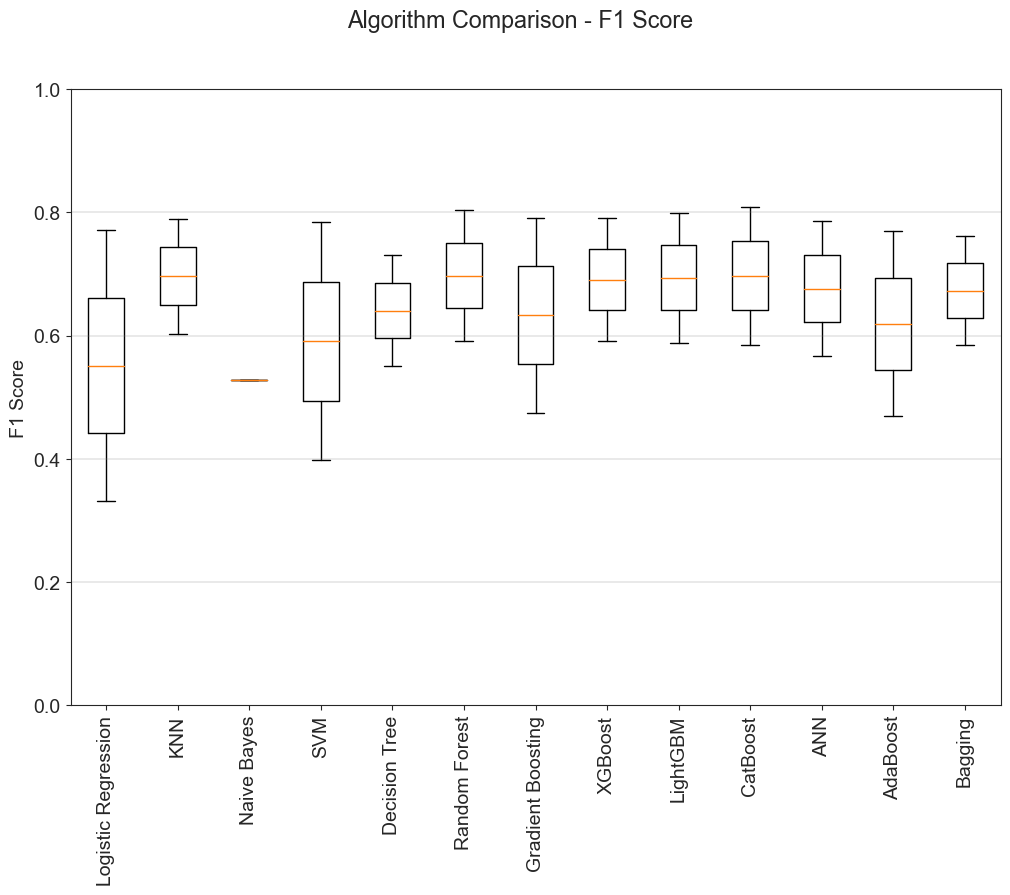

In [34]:
# compute and plot the f1 score for each algorithm using a box plot
f1_scores = []
for report in reports:
    f1_scores.append([report['0']['f1-score'], report['1']['f1-score']])

fig3 = plt.figure(figsize=(12, 8))
fig3.suptitle('Algorithm Comparison - F1 Score')
ax3 = fig3.add_subplot(111)
ax3.boxplot(f1_scores)
ax3.set_xticklabels(names, rotation=90)
ax3.set_ylabel('F1 Score')
ax3.set_ylim([0, 1])

# Add horizontal lines at y-ticks 0.2, 0.4, 0.6, 0.8
y_ticks = [0.2, 0.4, 0.6, 0.8]
for y_tick in y_ticks:
    ax3.axhline(y=y_tick, color='grey', linewidth=0.25)

plt.show()

### Compare precision and recall

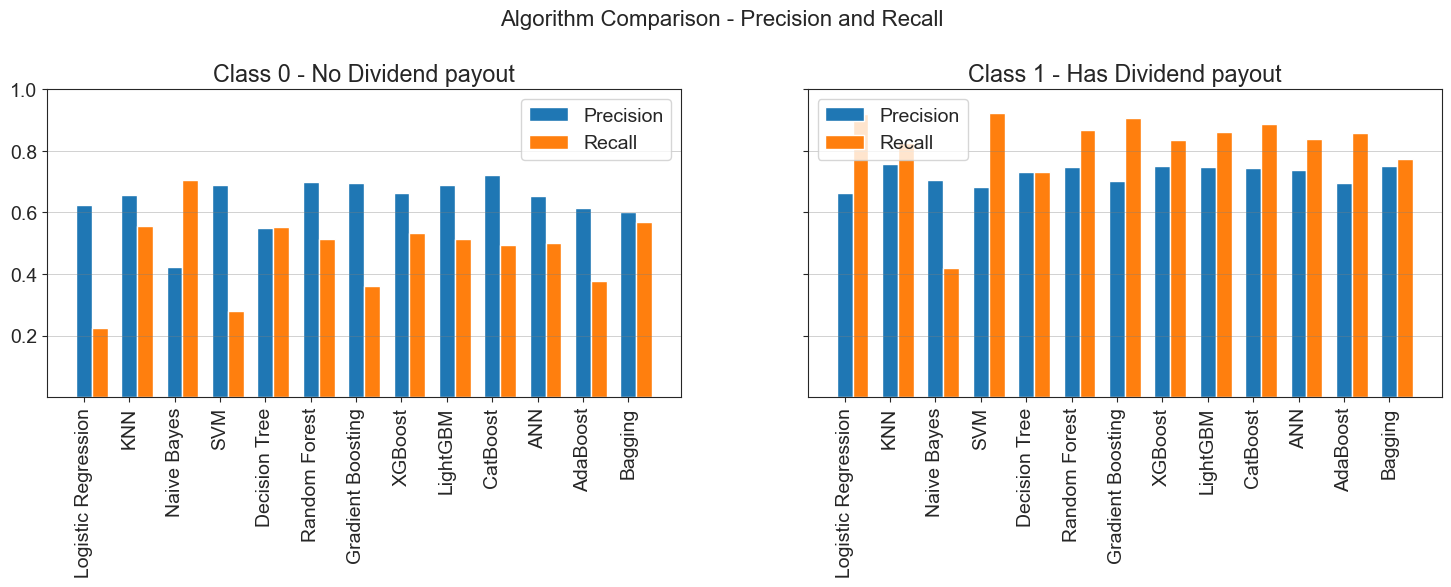

In [35]:
# compute and plot the precision and recall for each algorithm using a bar chart
precision_0 = []
recall_0 = []
precision_1 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), sharey=True)
fig.suptitle('Algorithm Comparison - Precision and Recall', fontsize=16, y=1.08)

# subplot for class 0
bar_width = 0.35
ax1.bar(names, precision_0, width=bar_width, label='Precision')
ax1.bar([x + bar_width for x in range(len(names))], recall_0, width=bar_width, label='Recall')
ax1.set_xticklabels(names, rotation=90)
ax1.set_title('Class 0 - No Dividend payout')
ax1.legend()

# subplot for class 1
ax2.bar(names, precision_1, width=bar_width, label='Precision')
ax2.bar([x + bar_width for x in range(len(names))], recall_1, width=bar_width, label='Recall')
ax2.set_xticklabels(names, rotation=90)
ax2.set_title('Class 1 - Has Dividend payout')
ax2.legend()

# set y-axis ticks
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1])

# add horizontal lines
for ax in (ax1, ax2):
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='gray', alpha=0.5, linewidth=0.5)

plt.show()


### Find the best algorithm based on accuracy and f1-score

In [36]:
# find the best algorithm based on accuracy and f1-score
best_acc_idx = max(range(len(results)), key=lambda i: results[i].mean())
best_f1_idx = f1_scores.index(max(f1_scores, key=lambda x: x[1])) 

In [37]:
y = df.iloc[:, 0]

In [38]:
print(f"Classification Report for the algorithm with highest accuracy: {names[best_acc_idx]}")
print(classification_report(y, cross_val_predict(models[best_acc_idx][1], X, y, cv=kfold)))


Classification Report for the algorithm with highest accuracy: CatBoost
              precision    recall  f1-score   support

           0       0.72      0.49      0.59      1568
           1       0.74      0.89      0.81      2616

    accuracy                           0.74      4184
   macro avg       0.73      0.69      0.70      4184
weighted avg       0.74      0.74      0.73      4184



In [39]:
print(f"Classification Report for the algorithm with highest F1-score: {names[best_f1_idx]}")
print(classification_report(y, cross_val_predict(models[best_f1_idx][1], X, y, cv=kfold)))

Classification Report for the algorithm with highest F1-score: CatBoost
              precision    recall  f1-score   support

           0       0.72      0.49      0.59      1568
           1       0.74      0.89      0.81      2616

    accuracy                           0.74      4184
   macro avg       0.73      0.69      0.70      4184
weighted avg       0.74      0.74      0.73      4184



In [40]:
# compute the classification report for each algorithm
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

# find the best algorithm based on precision for each class
best_prec_0_idx = precision_0.index(max(precision_0))
best_prec_1_idx = precision_1.index(max(precision_1))

# find the best algorithm based on recall for each class
best_recall_0_idx = recall_0.index(max(recall_0))
best_recall_1_idx = recall_1.index(max(recall_1))

# generate the classification reports for the best algorithms for each metric
print(f"Classification Report for Algorithm with Highest Precision for Class 0 ({names[best_prec_0_idx]}):")
print(classification_report(y, cross_val_predict(models[best_prec_0_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Precision for Class 1 ({names[best_prec_1_idx]}):")
print(classification_report(y, cross_val_predict(models[best_prec_1_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Recall for Class 0 ({names[best_recall_0_idx]}):")
print(classification_report(y, cross_val_predict(models[best_recall_0_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Recall for Class 1 ({names[best_recall_1_idx]}):")
print(classification_report(y, cross_val_predict(models[best_recall_1_idx][1], X, y, cv=kfold)))


Classification Report for Algorithm with Highest Precision for Class 0 (CatBoost):
              precision    recall  f1-score   support

           0       0.72      0.49      0.59      1568
           1       0.74      0.89      0.81      2616

    accuracy                           0.74      4184
   macro avg       0.73      0.69      0.70      4184
weighted avg       0.74      0.74      0.73      4184

Classification Report for Algorithm with Highest Precision for Class 1 (KNN):
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1568
           1       0.76      0.83      0.79      2616

    accuracy                           0.73      4184
   macro avg       0.71      0.69      0.70      4184
weighted avg       0.72      0.73      0.72      4184

Classification Report for Algorithm with Highest Recall for Class 0 (Naive Bayes):
              precision    recall  f1-score   support

           0       0.42      0.71      0.53    

### Feature importances for random forest model

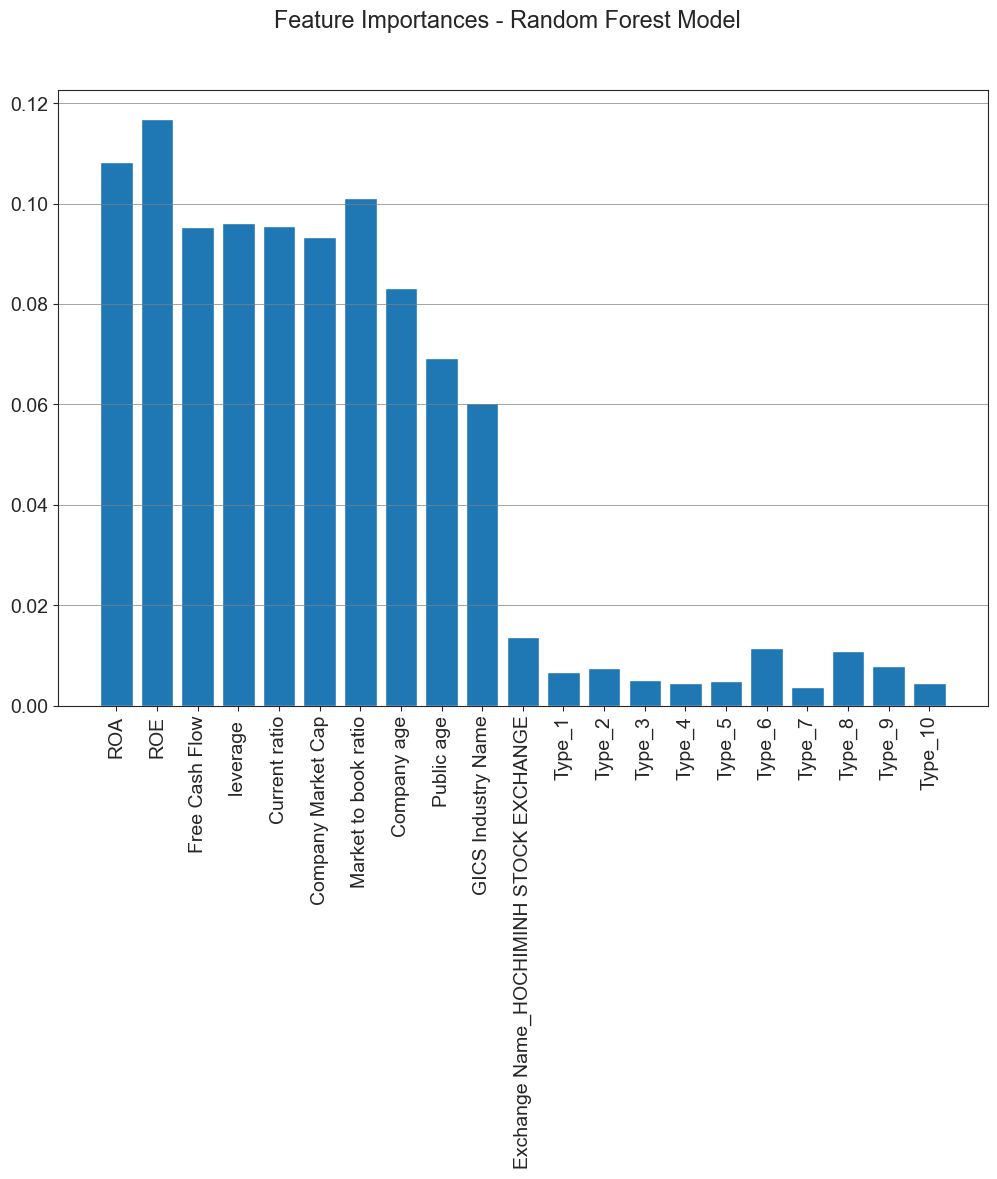

In [41]:
# define X_train and y_train
y_train = df.iloc[:, 0]
X_train = df.iloc[:, 1:]

# create and fit the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# compute the feature importances for the random forest model
rf_feature_importances = rf_model.feature_importances_

# plot the feature importances for the random forest model
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Feature Importances - Random Forest Model')
ax.bar(range(len(X_train.columns)), rf_feature_importances)
ax.set_xticks(range(len(X_train.columns)))
ax.set_xticklabels(list(X_train.columns), rotation=90)

# Add horizontal lines at y-ticks 
y_ticks = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]
for y_tick in y_ticks:
    ax.axhline(y=y_tick, color='grey', linewidth=0.5)

plt.show()
